Units used: GeV for masses, s for time, cm for distances

In [11]:
import os
import glob
import importlib

import matplotlib as mlib
import matplotlib.pyplot as plt

# plt.rcParams["text.usetex"] = True
# plt.rcParams["text.latex.preamble"] = r"\usepackage{slashed}"

import numpy as np
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


import sys
sys.path.insert(1, '/home/stasya/prj/alps-running/TdAlps-Internal/')
import TdAlps
from collections import OrderedDict

import scipy
import scipy.integrate as integrate
import scipy.optimize as optimize

import csv

In [12]:
# #Plotting settings

# font = {
#         'weight' : 'normal',
#         'size'   : 16}

# mlib.rc('font', **font)

### mass-coupling grid

In [13]:
#masslist= [0.05, 0.05, 0.1, 0.2, 0.3, 0.5, 1., 2., 4.]
masslist=np.sort(np.append(np.logspace(-2, 0, 25),[0.09, 0.101, 0.43, 0.47,0.55,\
                                                   0.95, 1, 1.5, 2, 2.5, 3, 3.2, 3.5, 4,\
                                                   0.0935, 0.095, 0.63, 0.65]))
masslistShort=np.logspace(-2,np.log(2.1), 40)
particleCodes=[*range(0,7,1)]

In [14]:
couplingList=np.sort(np.append(np.logspace(-6, 4, 20),np.logspace(-1, 2, 20)))
couplingListShort=np.logspace(np.log(8*10**-4), np.log(1.7), 25)

### importing bounds

In [33]:
# readArrayVisibleBoundBelleIIcffEqcWWEqcBB = np.load('output/visibleBoundBelleIIcffEqcWWEqcBB.npy')
readArrayVisibleBoundBelleIIcff = np.load('output/visibleBoundBelleIIcff.npy')
readArrayVisibleBoundBelleIIcWW = np.load('output/visibleBoundBelleIIcWW.npy')

In [34]:
BaBarBounds=genfromtxt('../ruth/bb.txt', delimiter='\t')

In [35]:
BellIIInvBounds05ab0bkg=genfromtxt('../ruth/b2_05_0bg.txt', delimiter='\t')
BellIIInvBounds50ab0bkg=genfromtxt('../ruth/b2_50_0bg.txt', delimiter='\t')

BellIIInvBounds05abWithbkg=genfromtxt('../ruth/b2_05_bg.txt', delimiter='\t')
BellIIInvBounds50abWithbkg=genfromtxt('../ruth/b2_50_bg.txt', delimiter='\t')

In [110]:
LHCbBoundscff=genfromtxt('output/LHCb_cff.dat', delimiter='\t')
LHCbBoundscWW=genfromtxt('output/LHCb_cWW.dat', delimiter='\t')

In [85]:
LHCbBoundscfflowMass=genfromtxt('output/LHCb_cff-low-mass.dat', delimiter='\t')
LHCbBoundscffhighMass=genfromtxt('output/LHCb_cff-high-mass.dat', delimiter='\t')

LHCbBoundscWWlowMass=genfromtxt('output/LHCb_cWW-low-mass.dat', delimiter='\t')
LHCbBoundscWWhighMass=genfromtxt('output/LHCb_cWW-high-mass.dat', delimiter='\t')

In [95]:
LHCbBoundsPromptcff=genfromtxt('output/LHCb_cff-prompt.dat', delimiter='\t')
LHCbBoundsPromptcWW=genfromtxt('output/LHCb_cWW-prompt.dat', delimiter='\t')

In [38]:
Na62Boundscff = genfromtxt('output/Na62_cff.dat', delimiter='\t')
Na62BoundscWW = genfromtxt('output/Na62_cWW.dat', delimiter='\t')

# Na62BoundscffLower = genfromtxt('output/Na62_cff_lower.dat', delimiter='\t')
# Na62BoundscffUpper = genfromtxt('output/Na62_cff_upper.dat', delimiter='\t')

# Na62BoundscWWLower = genfromtxt('output/Na62_cWW_lower.dat', delimiter='\t')
# Na62BoundscWWUpper = genfromtxt('output/Na62_cWW_upper.dat', delimiter='\t')

In [39]:
KOTOBoundscff = genfromtxt('output/KOTO_cff.dat', delimiter='\t')
KOTOBoundscWW = genfromtxt('output/KOTO_cWW.dat', delimiter='\t')

In [40]:
PrimEXBoundscff1 = genfromtxt('output/PrimEx_cff_1.dat', delimiter='\t')
PrimEXBoundscff2 = genfromtxt('output/PrimEx_cff_2.dat', delimiter='\t')

PrimEXBoundscWW1 = genfromtxt('output/PrimEx_cWW_1.dat', delimiter='\t')
PrimEXBoundscWW2 = genfromtxt('output/PrimEx_cWW_2.dat', delimiter='\t')

In [146]:
# BeamDumpBoundscff = genfromtxt('output/NuCal-CHARM-E137_cff.dat', delimiter='\t')
BeamDumpBoundscWW = genfromtxt('output/NuCal-CHARM-E137_cWW.dat', delimiter='\t')

In [42]:
# BaBargammagammaBoundscff = genfromtxt('output/BaBar-gammagamma_cff.dat', delimiter='\t')
# BaBargammagammaBoundscWW = genfromtxt('output/BaBar-gammagamma_cWW.dat', delimiter='\t')

In [148]:
BaBargammagammaBoundscWW1 = genfromtxt('output/BaBar-gammagamma_cWW-1.dat', delimiter='\t')
BaBargammagammaBoundscWW2 = genfromtxt('output/BaBar-gammagamma_cWW-2.dat', delimiter='\t')
BaBargammagammaBoundscWW3 = genfromtxt('output/BaBar-gammagamma_cWW-3.dat', delimiter='\t')

## Plot styles

In [25]:
def colour(r,g,b,a):
    return (r/256, g/256, b/256,a)

def colours(alpha):
    #return [(0,119/256,187/256,alpha),(51/256,187/256,238/256,alpha),(0,153/256,136/256,alpha),(34/256,136/256,51/256,alpha),(221/256,170/256,51/256,alpha),(238/256,119/256,51/256,alpha),(204/256,51/256,17/256,alpha),(136/256,34/256,85/256,alpha),(170/256,68/256,153/256,alpha)]
    darkBlue = colour(0,114,178,alpha)
    lightBlue = colour(86,180,233,alpha)
    green = colour(0,158,115,alpha)
    yellow = colour(240,228,66,alpha)
    orange = colour(230,159,0,alpha)
    red = colour(215,94,0,alpha)
    pink = colour(204,121,167,alpha)
    return [darkBlue, lightBlue, green, yellow, orange, red, pink]
    
def coloursX(alpha,X):
    if X>7:
        return colours(alpha) + coloursX(alpha,X-7)
    if X==7:
        return colours(alpha)
    if X==6:
        return colours(alpha)[0:6]
    if X==5:
        return colours(alpha)[0:4]+[colours(alpha)[5]]
    if X==4:
        return [colours(alpha)[1],colours(alpha)[2],colours(alpha)[3],colours(alpha)[5]]
    if X==3:
        return [colours(alpha)[1],colours(alpha)[2],colours(alpha)[5]]
    if X==2:
        return [colours(alpha)[0],colours(alpha)[5]]
    if X==1:
        return [(0,0,0,alpha)]
    return []

def colourSig(alpha):
    return colours(alpha)[5]

def colourSigBG(alpha):
    return colours(alpha)[4]

def coloursXbg1(alpha,X):
    newcolours = []
    baseColour = colours(alpha)[0]
    for i in range(1,X+1):
        newcolours.append((1-i/(X+1)*(1-baseColour[0]),1-i/(X+1)*(1-baseColour[1]),1-i/(X+1)*(1-baseColour[2]),alpha))
    return newcolours

def coloursXbg2(alpha,X):
    newcolours = []
    baseColour = colours(alpha)[2]
    for i in range(1,X+1):
        newcolours.append((1-i/(X+1)*(1-baseColour[0]),1-i/(X+1)*(1-baseColour[1]),1-i/(X+1)*(1-baseColour[2]),alpha))
    return newcolours

def coloursGrey(alpha):
    return (0.5,0.5,0.5,alpha)

def colourFF(alpha):
    return colours(alpha)[0]

def colourWW(alpha):
    return colours(alpha)[5]

In [26]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.dpi']= 300

In [27]:
colorBaBar="grey"
colorLHCb="slategrey"
colorNa62=colours(1)[4]#"teal"
colorBeamDump=colours(1)[6]
colorBaBargammagamma="peru"#colours(1)[3]
colorPrimEx=colours(1)[1]

colorBelleIIinvNobkg=colours(1)[5]
colorBelleIIinvWithbkg="peru"

colorBelleIIDispe="royalblue"
colorBelleIIDispmu="navy"
colorBelleIIDispgamma=colours(1)[2]

### Plots definitions functions

In [28]:
def plotBounds(boundsArray, particleCode, upper=False):
    if upper:
        return np.vstack([np.array(masslist),boundsArray[:,particleCode,1]]).T
    else:
        return np.vstack([np.array(masslist),boundsArray[:,particleCode,0]]).T

In [29]:
def stackBounds(xarray,arrSmattToLarge,arrLargeToSmall):
    combinedx=np.append(xarray,np.flip(xarray))
    combinedy=np.append(arrSmattToLarge,np.flip(arrLargeToSmall))
    
    return np.vstack([combinedx,combinedy]).T

In [30]:
def plotGen(inputarray,lineScatterFillORPolygon,color,linewidthORmarkersize,maCut=None,rescale=1,*args,**kwargs):
    
    if (maCut is not None):
        cut=inputarray[:,0]<maCut
        cutdata=inputarray[cut]
    else: 
        cutdata=inputarray
        
    
    data=cutdata[~np.isnan(cutdata[:,1])]
#     print(data[:,0])
    
    if not args:
        alphaPoly=0.3
    else:
        alphaPoly=args[0]
    
    if (lineScatterFillORPolygon=="polygon"):
        ax.fill(data[:,0],data[:,1]*rescale, color=color, alpha=1,**kwargs)
    if (lineScatterFillORPolygon=="oppacpolygon"):
        ax.fill(data[:,0],data[:,1]*rescale, facecolor=color,alpha=alphaPoly,\
                edgecolor=color,linewidth=linewidthORmarkersize,**kwargs)
    if (lineScatterFillORPolygon=="nonfilledpolygon"):
        ax.fill(data[:,0],data[:,1]*rescale, facecolor="none", edgecolor=color,\
                linewidth=linewidthORmarkersize, linestyle='-',**kwargs)
        
def plotAllowed(inputfile,x,y,z,zfixed):
    inputparams = np.array(genfromtxt(inputfile,  comments="#", delimiter=','))
    
    #choosing only rows with z=zfixed
    zfixedonly=inputparams[:,z]==zfixed
    params=inputparams[zfixedonly]

    allowed=params[:,5]==1

    plt.scatter(params[allowed,x], params[allowed,y], c='green')
    plt.scatter(params[~allowed,x], params[~allowed,y], c='red')
    
def plotAllAllowed(inputfile,x,y):
    params = np.array(genfromtxt(inputfile,  comments="#", delimiter=','))
    
    allowed=params[:,5]==1
    
    
    plt.scatter(params[allowed,x], params[allowed,y], c='green')
    plt.scatter(params[~allowed,x], params[~allowed,y], c='red')
    
    

In [62]:
# function that plots cut-out regions from 1612.07818 and Na62

def cutoutRegionsLHCb(m):
    return np.heaviside(m - 0.25,0)*np.heaviside(-m + 0.4,0) + np.heaviside(m - 0.5,0)*np.heaviside(-m + 2.9,0)\
    + np.heaviside(m - 3.2,0)*np.heaviside(-m + 3.6,0) + np.heaviside(m - 3.9,0)*np.heaviside(-m + 4.7,0)
#     return np.heaviside(m - 3.9,0)*np.heaviside(-m + 4.7,0)

def cutoutRegionsLHCbHighMasses(m):
    return 1-(np.heaviside(m - 3.2,0)*np.heaviside(-m + 3.6,0) \
              + np.heaviside(m - 3.9,0)*np.heaviside(-m + 4.7,0))

def cutoutRegionsNa62(m):
    return 1-np.heaviside(m - 0.110,0)*np.heaviside(-m + 0.154,0)

#from 2111.01800
def cutoutRegionsBaBargammagamma(m):
    return 1-(np.heaviside(m - 0.1,0)*np.heaviside(-m + 0.175,0)\
              +np.heaviside(m - 0.45,0)*np.heaviside(-m + 0.63,0)\
             +np.heaviside(m - 0.91,0)*np.heaviside(-m + 1.01,0))

def plotCutOutRegions(cutoutRegionsFunc,xmin,xmax,ylower,yupper,order,**kwargs):
    m=np.linspace(xmin,xmax,num=10000);
    plt.fill_between(m,np.maximum((1-cutoutRegionsFunc(m))*yupper,ylower),ylower,\
                     zorder=order,linewidth=0,**kwargs)

# Combined plots

To fix the double counting in the cff scenario, we rescale y-axis enties by 1/2

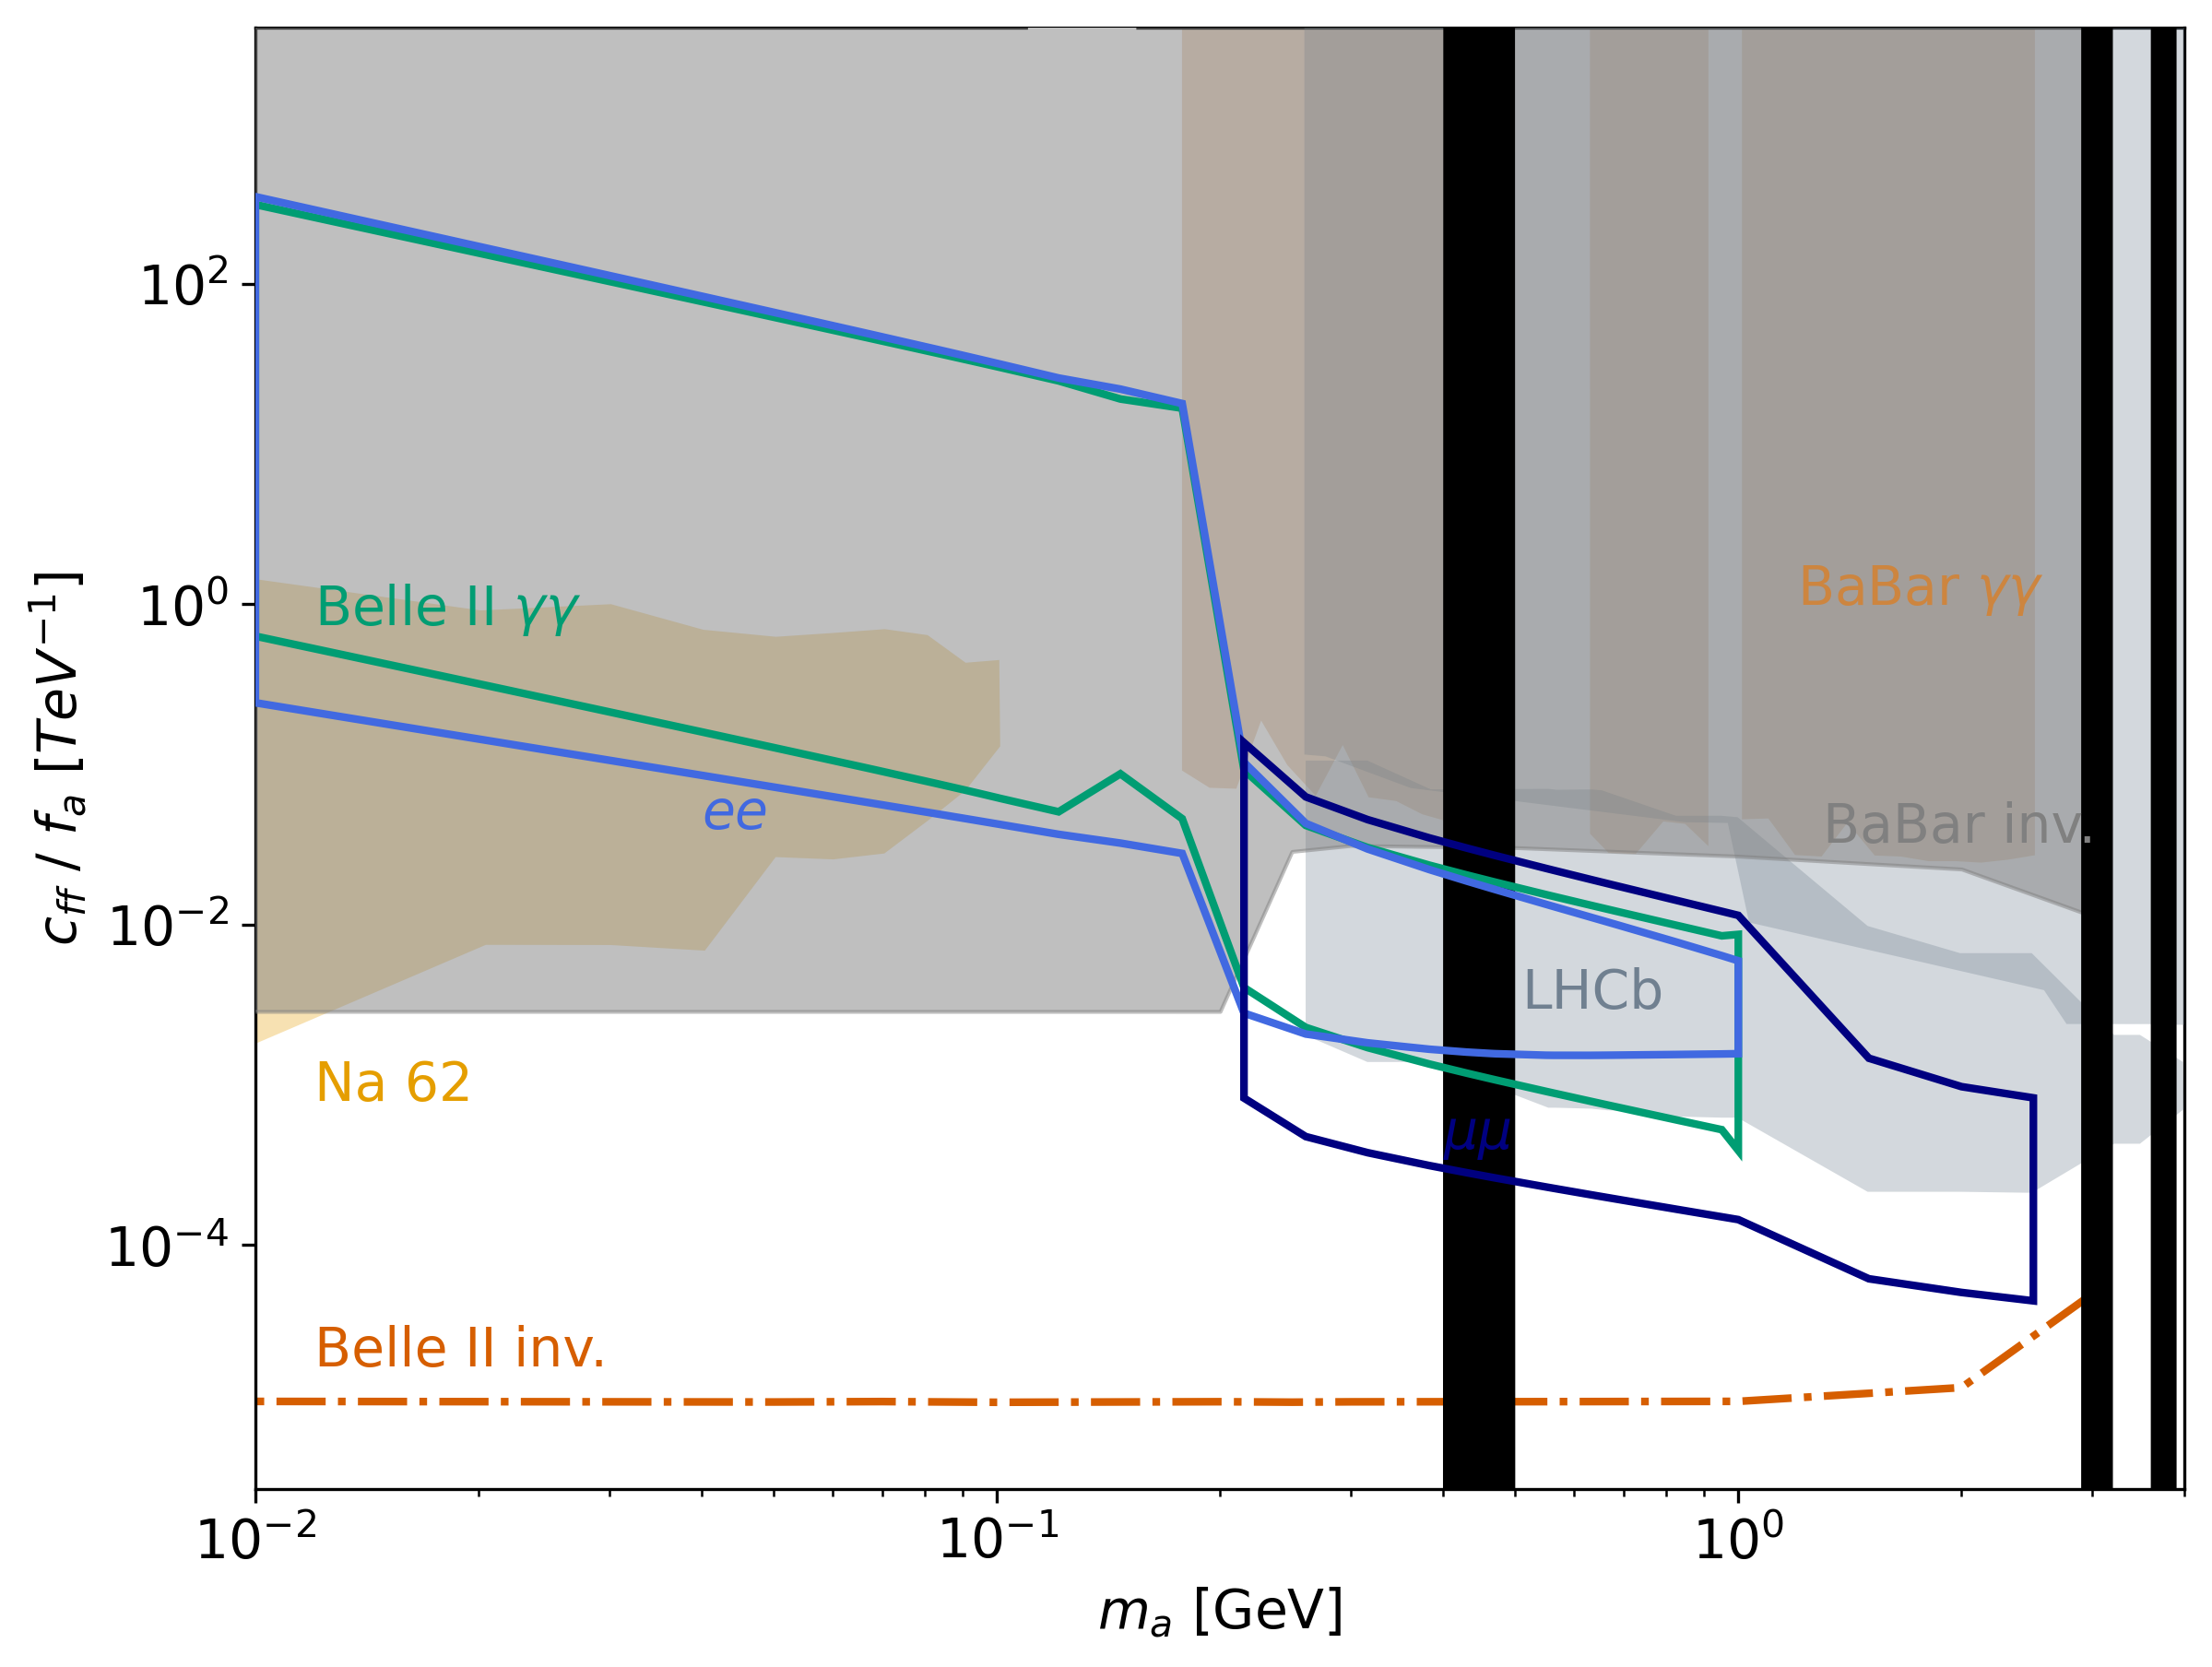

In [174]:
fig, ax = plt.subplots(figsize=(9, 7))


plotGen(BaBargammagammaBoundscff,"oppacpolygon",colorBaBargammagamma,0,None,1/2,label='BaBar $\gamma \gamma$')
plotCutOutRegions(cutoutRegionsBaBargammagamma,0.1,3,10**-5,10**5,2,color="white")

plotGen(Na62Boundscff,"oppacpolygon",colorNa62,0,None,1/2,label='Na62',zorder=2)
plotCutOutRegions(cutoutRegionsNa62,0.05,0.2,10**-2,10**5,3,color="white")


plotGen(LHCbBoundscff,"oppacpolygon",colorLHCb,0,5,1/2,label='LHCb, $\mu^+ \mu^-$ displaced',\
        zorder=3)
# plotGen(LHCbBoundscfflowMass,"oppacpolygon",colorLHCb,0,6,0.6,1/2,label='LHCb, $\mu^+ \mu^-$ displaced',\
#         zorder=3)
# plotGen(LHCbBoundscffhighMass,"oppacpolygon",colorLHCb,0,6,0.6,1/2,\
#         zorder=3)
# plotCutOutRegions(cutoutRegionsLHCbHighMasses,0.3,5,3*10**-4,10**-2,5,color="white")

plotGen(LHCbBoundsPromptcff,"oppacpolygon",colorLHCb,0,5,1/2,zorder=3)
plotCutOutRegions(cutoutRegionsLHCb,0.3,5,10**-6,10**5,5,color="black")


# ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c=colorBaBar, ls='--',lw=2)
ax.fill_between(BaBarBounds[:,0], BaBarBounds[:,1]/2, y2=10**4, color=colorBaBar,zorder=4,alpha=0.5,\
               label='BaBar, inv')

# ax.plot(BellIIInvBounds05abWithbkg[:,0],BellIIInvBounds05abWithbkg[:,1],c=colorBelleIIinvWithbkg, ls='-',lw=2)
# ax.plot(BellIIInvBounds50abWithbkg[:,0],BellIIInvBounds50abWithbkg[:,1],c=colorBelleIIinvWithbkg, ls='-.',lw=2)

# ax.plot(BellIIInvBounds05ab0bkg[:,0],BellIIInvBounds05ab0bkg[:,1],c=colorBelleIIinvNobkg, ls='-',lw=2)
ax.plot(BellIIInvBounds50ab0bkg[:,0],BellIIInvBounds50ab0bkg[:,1]/2,c=colorBelleIIinvNobkg, ls='-.',lw=2)

# plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,5,0],\
#                     readArrayVisibleBoundBelleIIcff[:,5,1]),"oppacpolygon","deepskyblue",0,1,0.4,\
#                     label='Belle II, $X=\gamma \gamma $',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,5,0],\
                    readArrayVisibleBoundBelleIIcff[:,5,1]),"nonfilledpolygon",colorBelleIIDispgamma,2,None,\
                    1/2,label='Belle II, $\gamma \gamma $',zorder=6)

# plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,0,0],\
#                     readArrayVisibleBoundBelleIIcff[:,0,1]),"oppacpolygon","darkblue",0,1,0.3,\
#                     label='Belle II, $X=e^+ e^-$',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,0,0],\
                    readArrayVisibleBoundBelleIIcff[:,0,1]),"nonfilledpolygon",colorBelleIIDispe,2,None,\
                    1/2,label='Belle II, $e^+ e^-$',zorder=6)

# plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,1,0],\
#                     readArrayVisibleBoundBelleIIcff[:,1,1]),"oppacpolygon","rebeccapurple",0,1,0.5,\
#                     label='Belle II, $X=\mu^+ \mu^-$',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,1,0],\
                    readArrayVisibleBoundBelleIIcff[:,1,1]),"nonfilledpolygon",colorBelleIIDispmu,2,None,\
                       1/2,label='Belle II, $\mu^+ \mu^-$',zorder=6)

# plotGen(BeamDumpBoundscff,"oppacpolygon",colorBeamDump,0,0.5,0.4,1/2, label='Beam dump',zorder=5)

# p = mpatches.Rectangle((0.85,7*10**-4), 0.2, 0.04, linewidth=0, fill=None, hatch='///',zorder=5)
# ax.add_patch(p)


# ax.set_title('Projected bounds on $BR( B^+ \\rightarrow K^+ + X )$')

ax.set_xlabel('$m_a$ [GeV]')
ax.set_ylabel('$c_{ff}\ /\ f_a\ [TeV^{-1}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**-2, 4)
ax.set_ylim(3*10**-6, 4*10**3)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) 

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='grey', linestyle='--',
                          markersize=15, label='BaBar, X='+"ME")
belleIIInv= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, no bg')
belleIIInv50= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, no bg')
belleIIInvbg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, with bg')
belleIIInv50bg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, with bg')

handles.insert(0, belleIIInv50)
# handles.insert(0, belleIIInv)
# handles.insert(0, belleIIInv50bg)
# handles.insert(0, belleIIInvbg) 
# handles.insert(0, babar)   

# ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.4, 1), framealpha=1)
# plt.legend(bbox_to_anchor=(0.5, 0.5), bbox_transform=plt.gcf().transFigure) 

plt.text(1.3, 6.5E-2/2, 'BaBar inv.',rotation=0,c=colorBaBar,fontsize=14,zorder=7)
plt.text(0.51, 6E-3/2, 'LHCb',rotation=0,c=colorLHCb,fontsize=14,zorder=6)
plt.text(1.2E-2, 1.6E-3/2, 'Na 62',rotation=0,c=colorNa62,fontsize=14,zorder=6)
plt.text(1.2, 1, 'BaBar $\gamma \gamma$',rotation=0,c=colorBaBargammagamma,fontsize=14,zorder=6)
plt.text(1.2E-2, 3.5E-5/2, 'Belle II inv.',rotation=0,c=colorBelleIIinvNobkg,fontsize=14,zorder=6)
plt.text(0.4, 8E-4/2, '$\mu \mu$',rotation=0,c=colorBelleIIDispmu,fontsize=14,zorder=6)
plt.text(1.2E-2, 1.5E0/2, 'Belle II $\gamma \gamma$',rotation=0,c=colorBelleIIDispgamma,fontsize=14,zorder=7)
plt.text(4E-2, 8E-2/2, '$e e$',rotation=0,c=colorBelleIIDispe,fontsize=14,zorder=6)


plt.savefig('plots/Bounds-projections-cff.png', dpi=300, bbox_inches='tight')

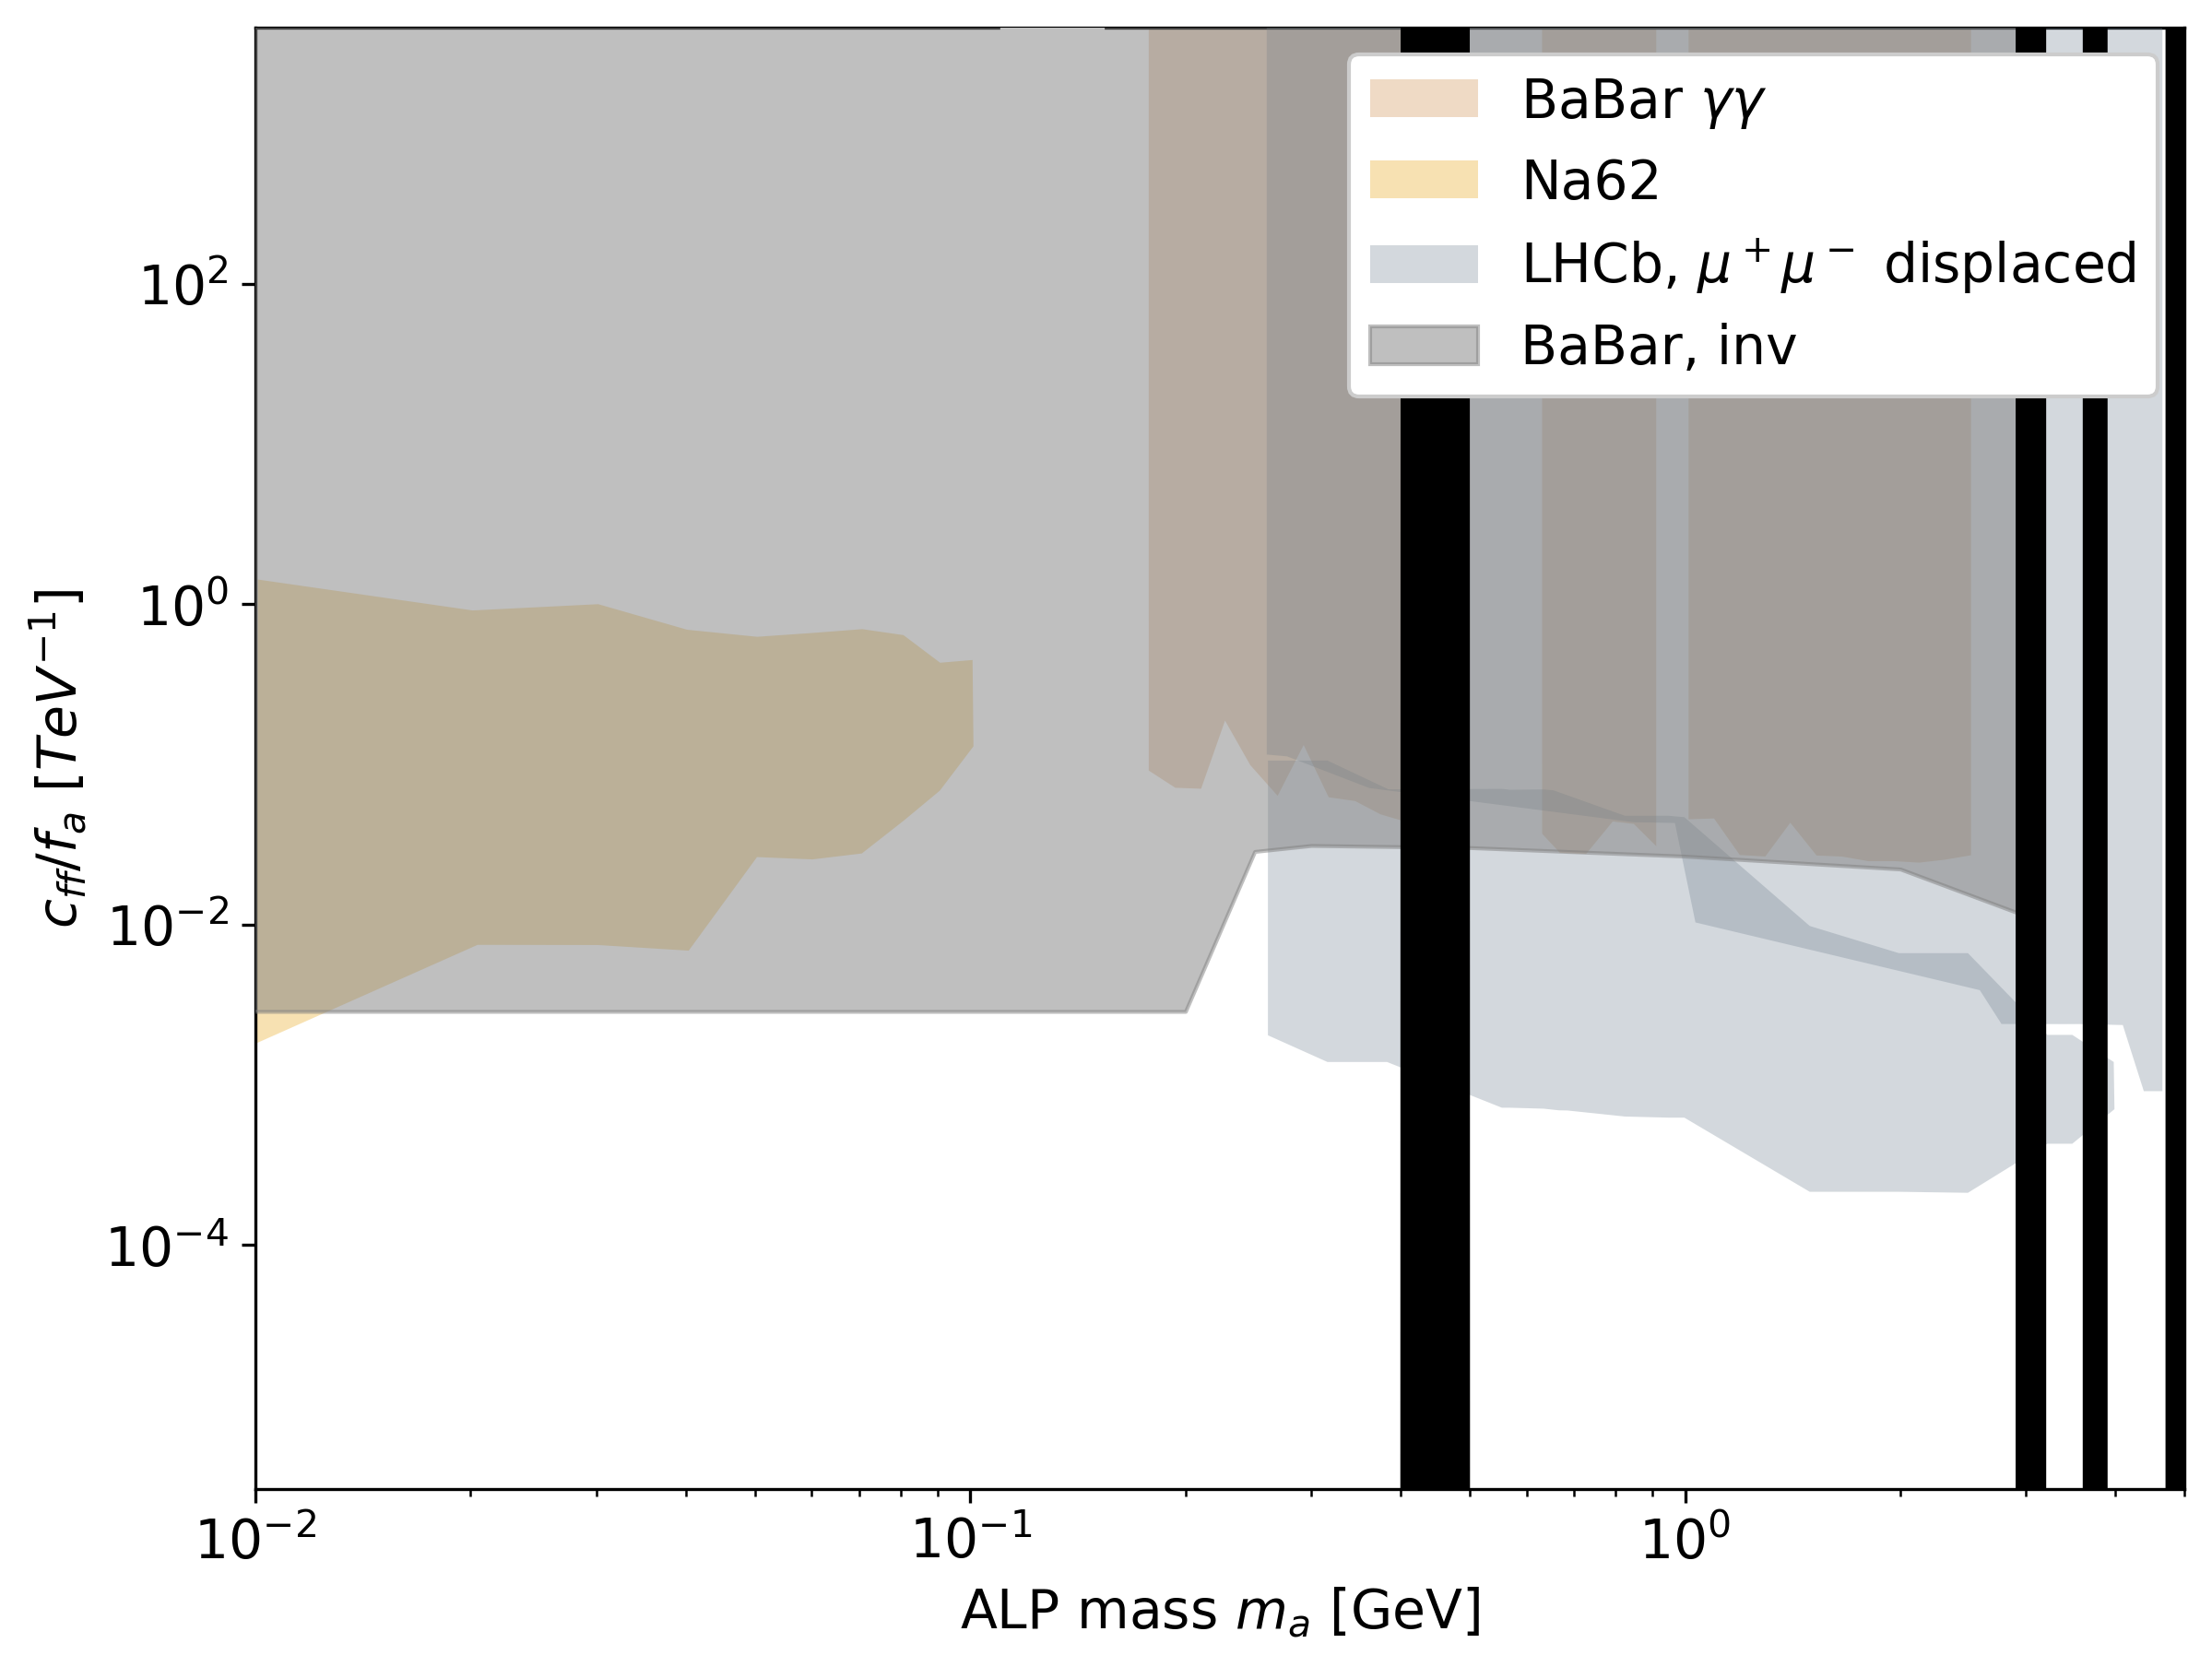

In [169]:
fig, ax = plt.subplots(figsize=(9, 7))


plotGen(BaBargammagammaBoundscff,"oppacpolygon",colorBaBargammagamma,0,None,1/2,label='BaBar $\gamma \gamma$')
plotCutOutRegions(cutoutRegionsBaBargammagamma,0.1,3,10**-5,10**5,2,color="white")

plotGen(Na62Boundscff,"oppacpolygon",colorNa62,0,None,1/2, label='Na62',zorder=2)
plotCutOutRegions(cutoutRegionsNa62,0.05,0.2,10**-2,10**5,3,color="white")

plotGen(LHCbBoundscff,"oppacpolygon",colorLHCb,0,5,1/2,label='LHCb, $\mu^+ \mu^-$ displaced',\
        zorder=3)

# plotGen(LHCbBoundscfflowMass,"oppacpolygon",colorLHCb,0,6,0.6,1/2,label='LHCb, $\mu^+ \mu^-$',\
#         zorder=3)
# plotGen(LHCbBoundscffhighMass,"oppacpolygon",colorLHCb,0,6,0.6,1/2,\
#         zorder=3)
# plotCutOutRegions(cutoutRegionsLHCbHighMasses,0.3,5,3*10**-4,2*10**-3,5,color="blue")

plotGen(LHCbBoundsPromptcff,"oppacpolygon",colorLHCb,0,5,1/2,zorder=3)
plotCutOutRegions(cutoutRegionsLHCb,0.3,5,10**-6,10**5,5,color="black")


# ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c=colorBaBar, ls='--',lw=2)
ax.fill_between(BaBarBounds[:,0], BaBarBounds[:,1]/2, y2=10**4, color=colorBaBar,zorder=4,alpha=0.5,\
               label='BaBar, inv')

# plotGen(PrimEXBoundscff1,"oppacpolygon",colorPrimEx,0,0.5,1,1/2, label='PrimEx',zorder=3)
# plotGen(PrimEXBoundscff2,"oppacpolygon",colorPrimEx,0,0.5,1,1/2,label='PrimEx',zorder=5)

# plotGen(BeamDumpBoundscff,"oppacpolygon",colorBeamDump,0,0.5,0.4,1/2, label='Beam dump',zorder=5)


# p = mpatches.Rectangle((0.85,7*10**-4), 0.2, 0.04, linewidth=0, fill=None, hatch='///',zorder=5)
# ax.add_patch(p)


# ax.set_title('Projected bounds on $BR( B^+ \\rightarrow K^+ + X )$')

ax.set_xlabel('ALP mass $m_a$ [GeV]')
ax.set_ylabel('$c_{ff}/f_a\ [TeV^{-1}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**-2, 5)
ax.set_ylim(3*10**-6, 4*10**3)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='grey', linestyle='--',
                          markersize=15, label='BaBar, X='+"ME")
belleIIInv= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, no bg')
belleIIInv50= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, no bg')
belleIIInvbg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, with bg')
belleIIInv50bg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, with bg')

# handles.insert(0, belleIIInv50)
# handles.insert(0, belleIIInv)
# handles.insert(0, belleIIInv50bg)
# handles.insert(0, belleIIInvbg) 
# handles.insert(0, babar)   

ax.legend(handles=handles, loc='upper right', framealpha=1)


plt.savefig('plots/Bounds-existing-cff.png', dpi=300, bbox_inches='tight')

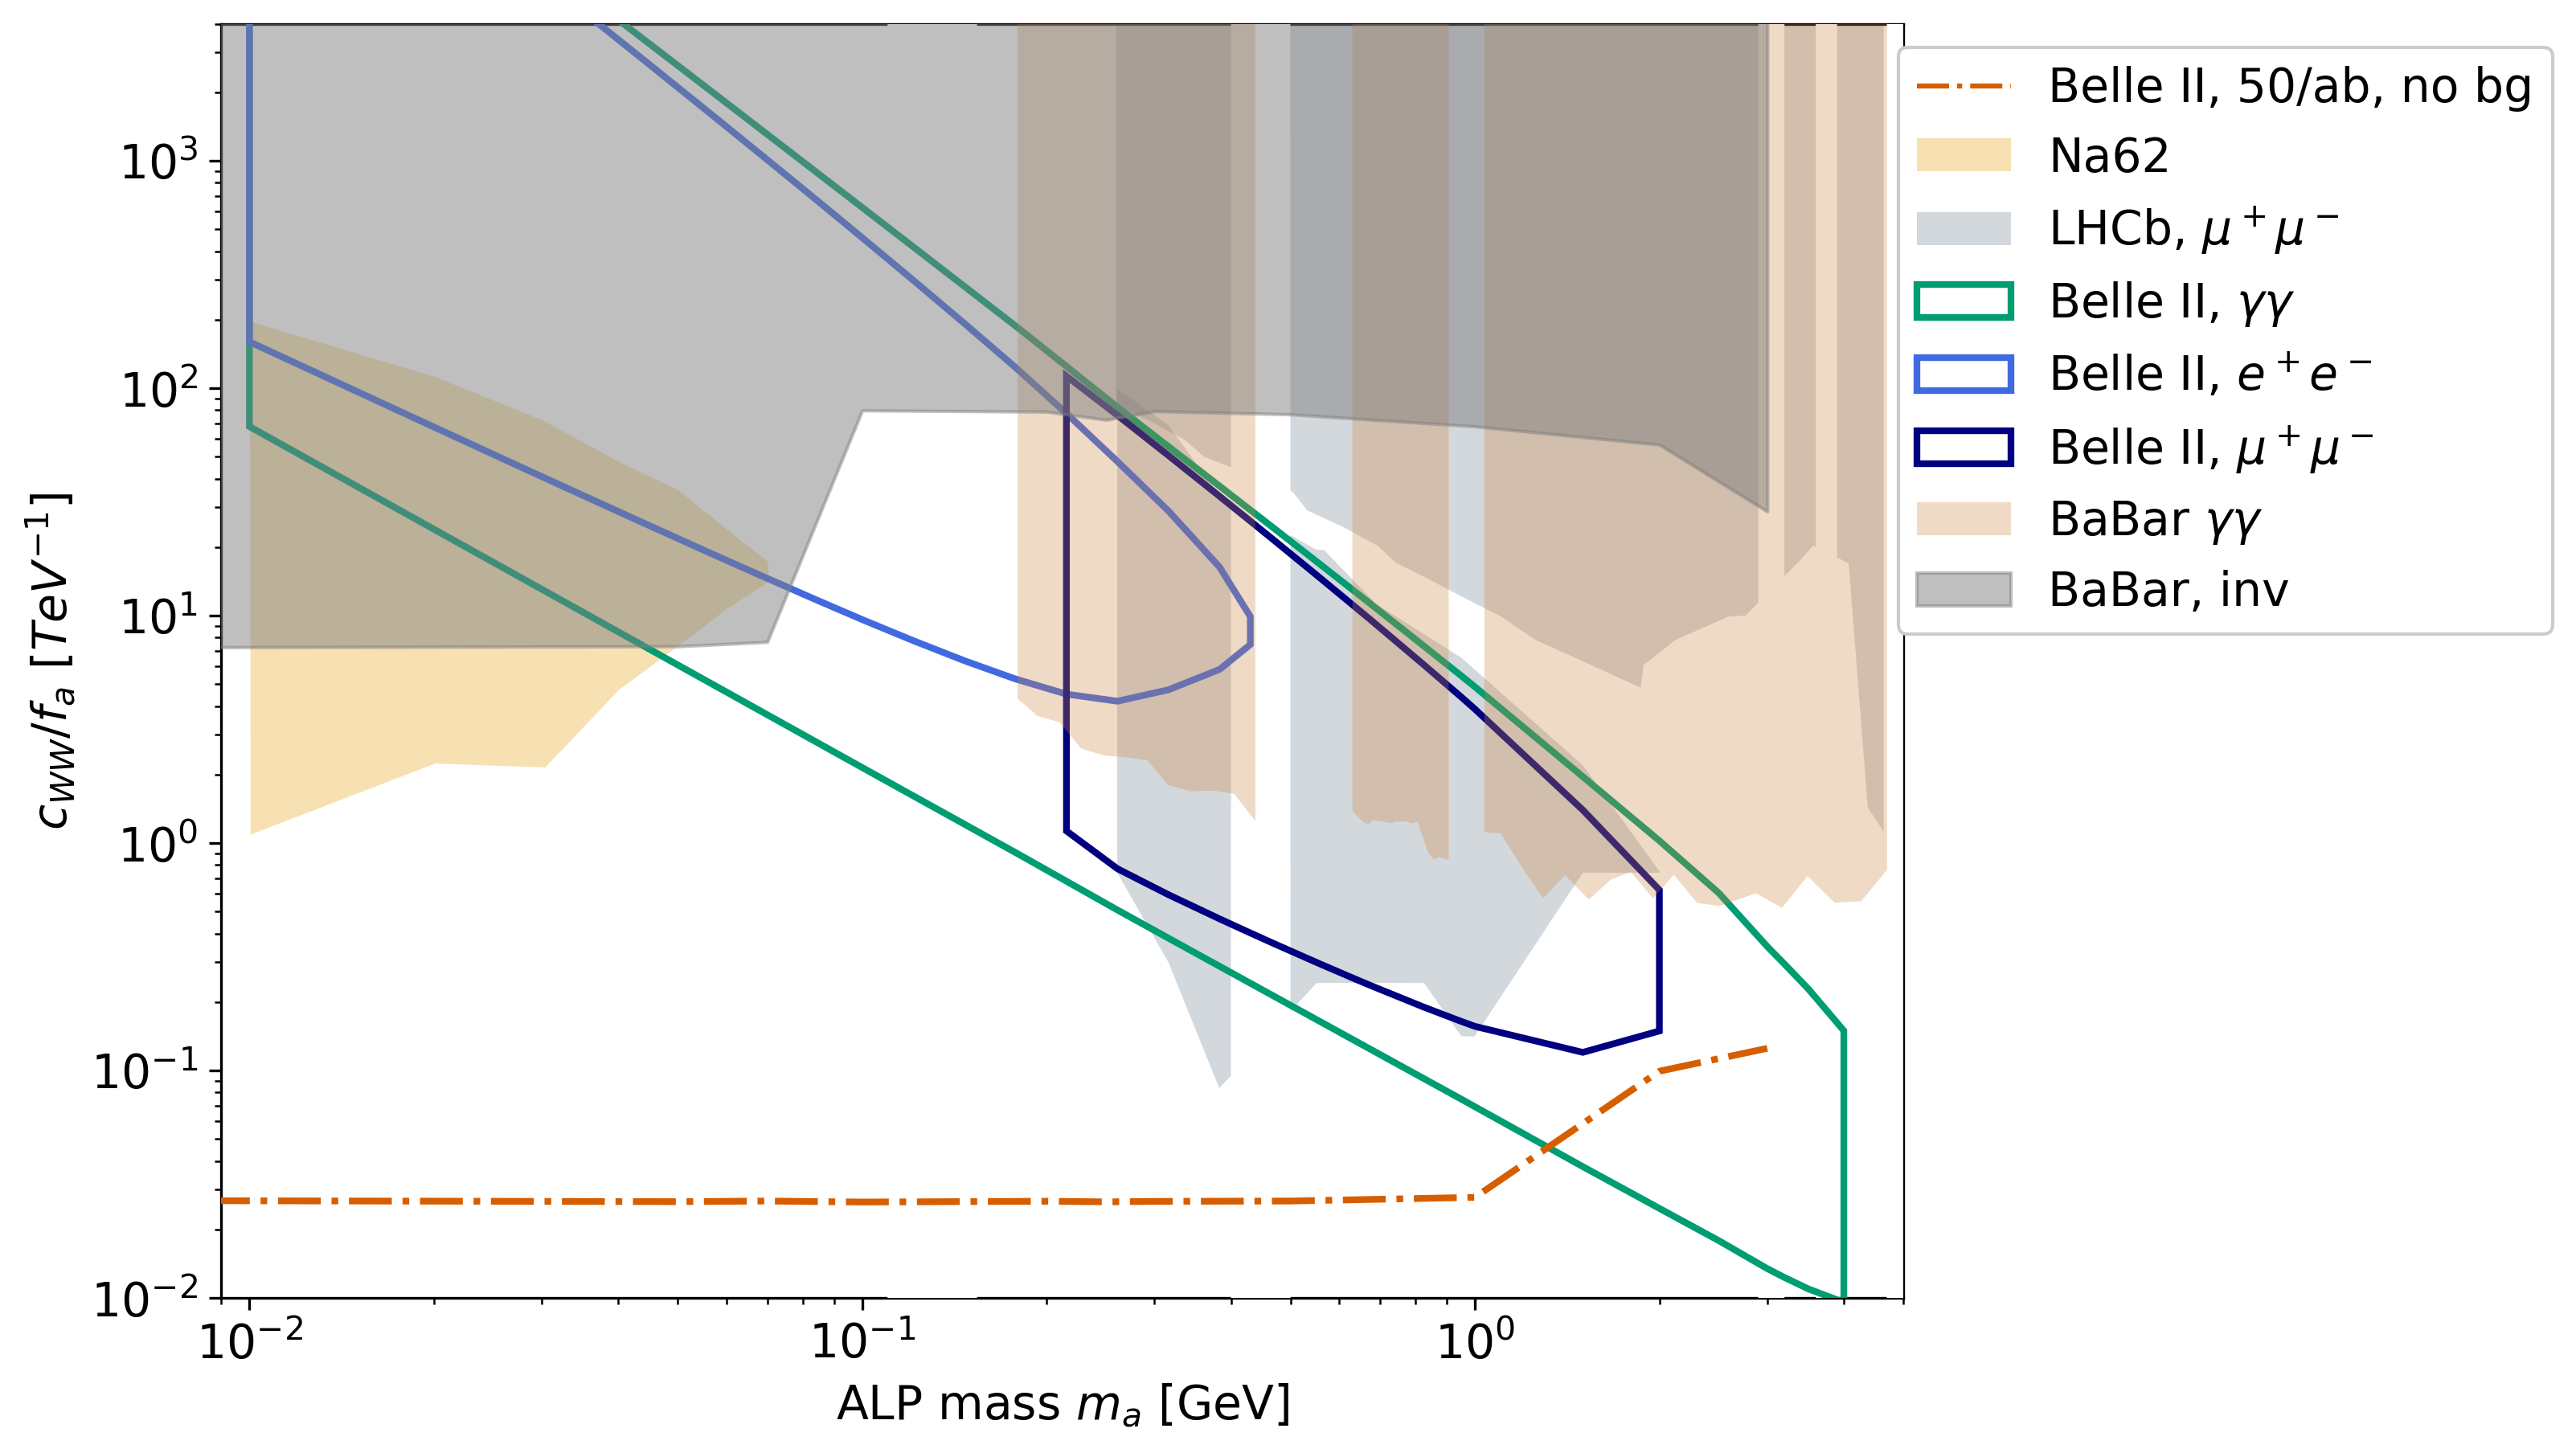

In [175]:
fig, ax = plt.subplots(figsize=(9, 7))


plotGen(Na62BoundscWW,"oppacpolygon",colorNa62,0,None,1, label='Na62',zorder=2)
plotCutOutRegions(cutoutRegionsNa62,0.05,0.2,10**-2,10**5,3,color="white")

plotGen(LHCbBoundscWW,"oppacpolygon",colorLHCb,0,6,1,label='LHCb, $\mu^+ \mu^-$',zorder=1)

# plotGen(LHCbBoundscWWlowMass,"oppacpolygon",colorLHCb,0,5,0.6, label='LHCb, $\mu^+ \mu^-$',zorder=3)
# plotGen(LHCbBoundscWWhighMass,"oppacpolygon",colorLHCb,0,5,0.6, zorder=3)
# plotCutOutRegions(cutoutRegionsLHCbHighMasses,0.3,5,3*10**-4,10**-2,5,color="black")

plotGen(LHCbBoundsPromptcWW,"oppacpolygon",colorLHCb,0,6,1,zorder=1)
plotCutOutRegions(cutoutRegionsLHCb,0.3,5,10**-3,10**5,5,color="white")


# ax.plot(BellIIInvBounds05abWithbkg[:,0],BellIIInvBounds05abWithbkg[:,2],c=colorBelleIIinvWithbkg, ls='-',lw=2)
# ax.plot(BellIIInvBounds50abWithbkg[:,0],BellIIInvBounds50abWithbkg[:,2],c=colorBelleIIinvWithbkg, ls='-.',lw=2)

# ax.plot(BellIIInvBounds05ab0bkg[:,0],BellIIInvBounds05ab0bkg[:,2],c=colorBelleIIinvNobkg, ls='-',lw=2)

# plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,5,0],\
#                     readArrayVisibleBoundBelleIIcWW[:,5,1]),"oppacpolygon","deepskyblue",0,1,0.4,\
#                     label='Belle II, $X=\gamma \gamma $',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,5,0],\
                    readArrayVisibleBoundBelleIIcWW[:,5,1]),"nonfilledpolygon",colorBelleIIDispgamma,2,None,\
                    label='Belle II, $\gamma \gamma $',zorder=5)

# plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,0,0],\
#                     readArrayVisibleBoundBelleIIcWW[:,0,1]),"oppacpolygon","darkblue",0,1,0.3,\
#                     label='Belle II, $X=e^+ e^-$',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,0,0],\
                    readArrayVisibleBoundBelleIIcWW[:,0,1]),"nonfilledpolygon",colorBelleIIDispe,2,None,\
                    label='Belle II, $e^+ e^-$',zorder=5)

# plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,1,0],\
#                     readArrayVisibleBoundBelleIIcWW[:,1,1]),"oppacpolygon","rebeccapurple",0,1,0.5,\
#                     label='Belle II, $X=\mu^+ \mu^-$',zorder=3)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,1,0],\
                    readArrayVisibleBoundBelleIIcWW[:,1,1]),"nonfilledpolygon",colorBelleIIDispmu,2,None,\
                       label='Belle II, $\mu^+ \mu^-$',zorder=5)

# p = mpatches.Rectangle((0.8,8*10**-2), 0.4, 20, linewidth=0, fill=None, hatch='//')
# ax.add_patch(p)

plotGen(BaBargammagammaBoundscWW1,"oppacpolygon",colorBaBargammagamma,0,None,1,label='BaBar $\gamma \gamma$',zorder=5)
plotGen(BaBargammagammaBoundscWW2,"oppacpolygon",colorBaBargammagamma,0,None,1,zorder=5)
plotGen(BaBargammagammaBoundscWW3,"oppacpolygon",colorBaBargammagamma,0,None,1,zorder=5)

ax.fill_between(BaBarBounds[:,0], BaBarBounds[:,2], y2=10**4, color=colorBaBar,zorder=6,alpha=0.5,\
               label='BaBar, inv')

ax.plot(BellIIInvBounds50ab0bkg[:,0],BellIIInvBounds50ab0bkg[:,2],c=colorBelleIIinvNobkg, ls='-.',lw=2,zorder=5)

ax.set_xlabel('ALP mass $m_a$ [GeV]')
ax.set_ylabel('$c_{WW}/f_a\ [TeV^{-1}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9*10**-3, 5)
ax.set_ylim(10**-2, 4*10**3)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='grey', linestyle='--',
                          markersize=15, label='BaBar, X='+"ME")
belleIIInv= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, no bg')
belleIIInv50= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, no bg')
belleIIInvbg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, with bg')
belleIIInv50bg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, with bg')

handles.insert(0, belleIIInv50)
# handles.insert(0, belleIIInv)
# handles.insert(0, belleIIInv50bg)
# handles.insert(0, belleIIInvbg) 
# handles.insert(0, babar)   

ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.4, 1), framealpha=1)


plt.savefig('plots/Bounds-projections-cWW.png', dpi=300, bbox_inches='tight')

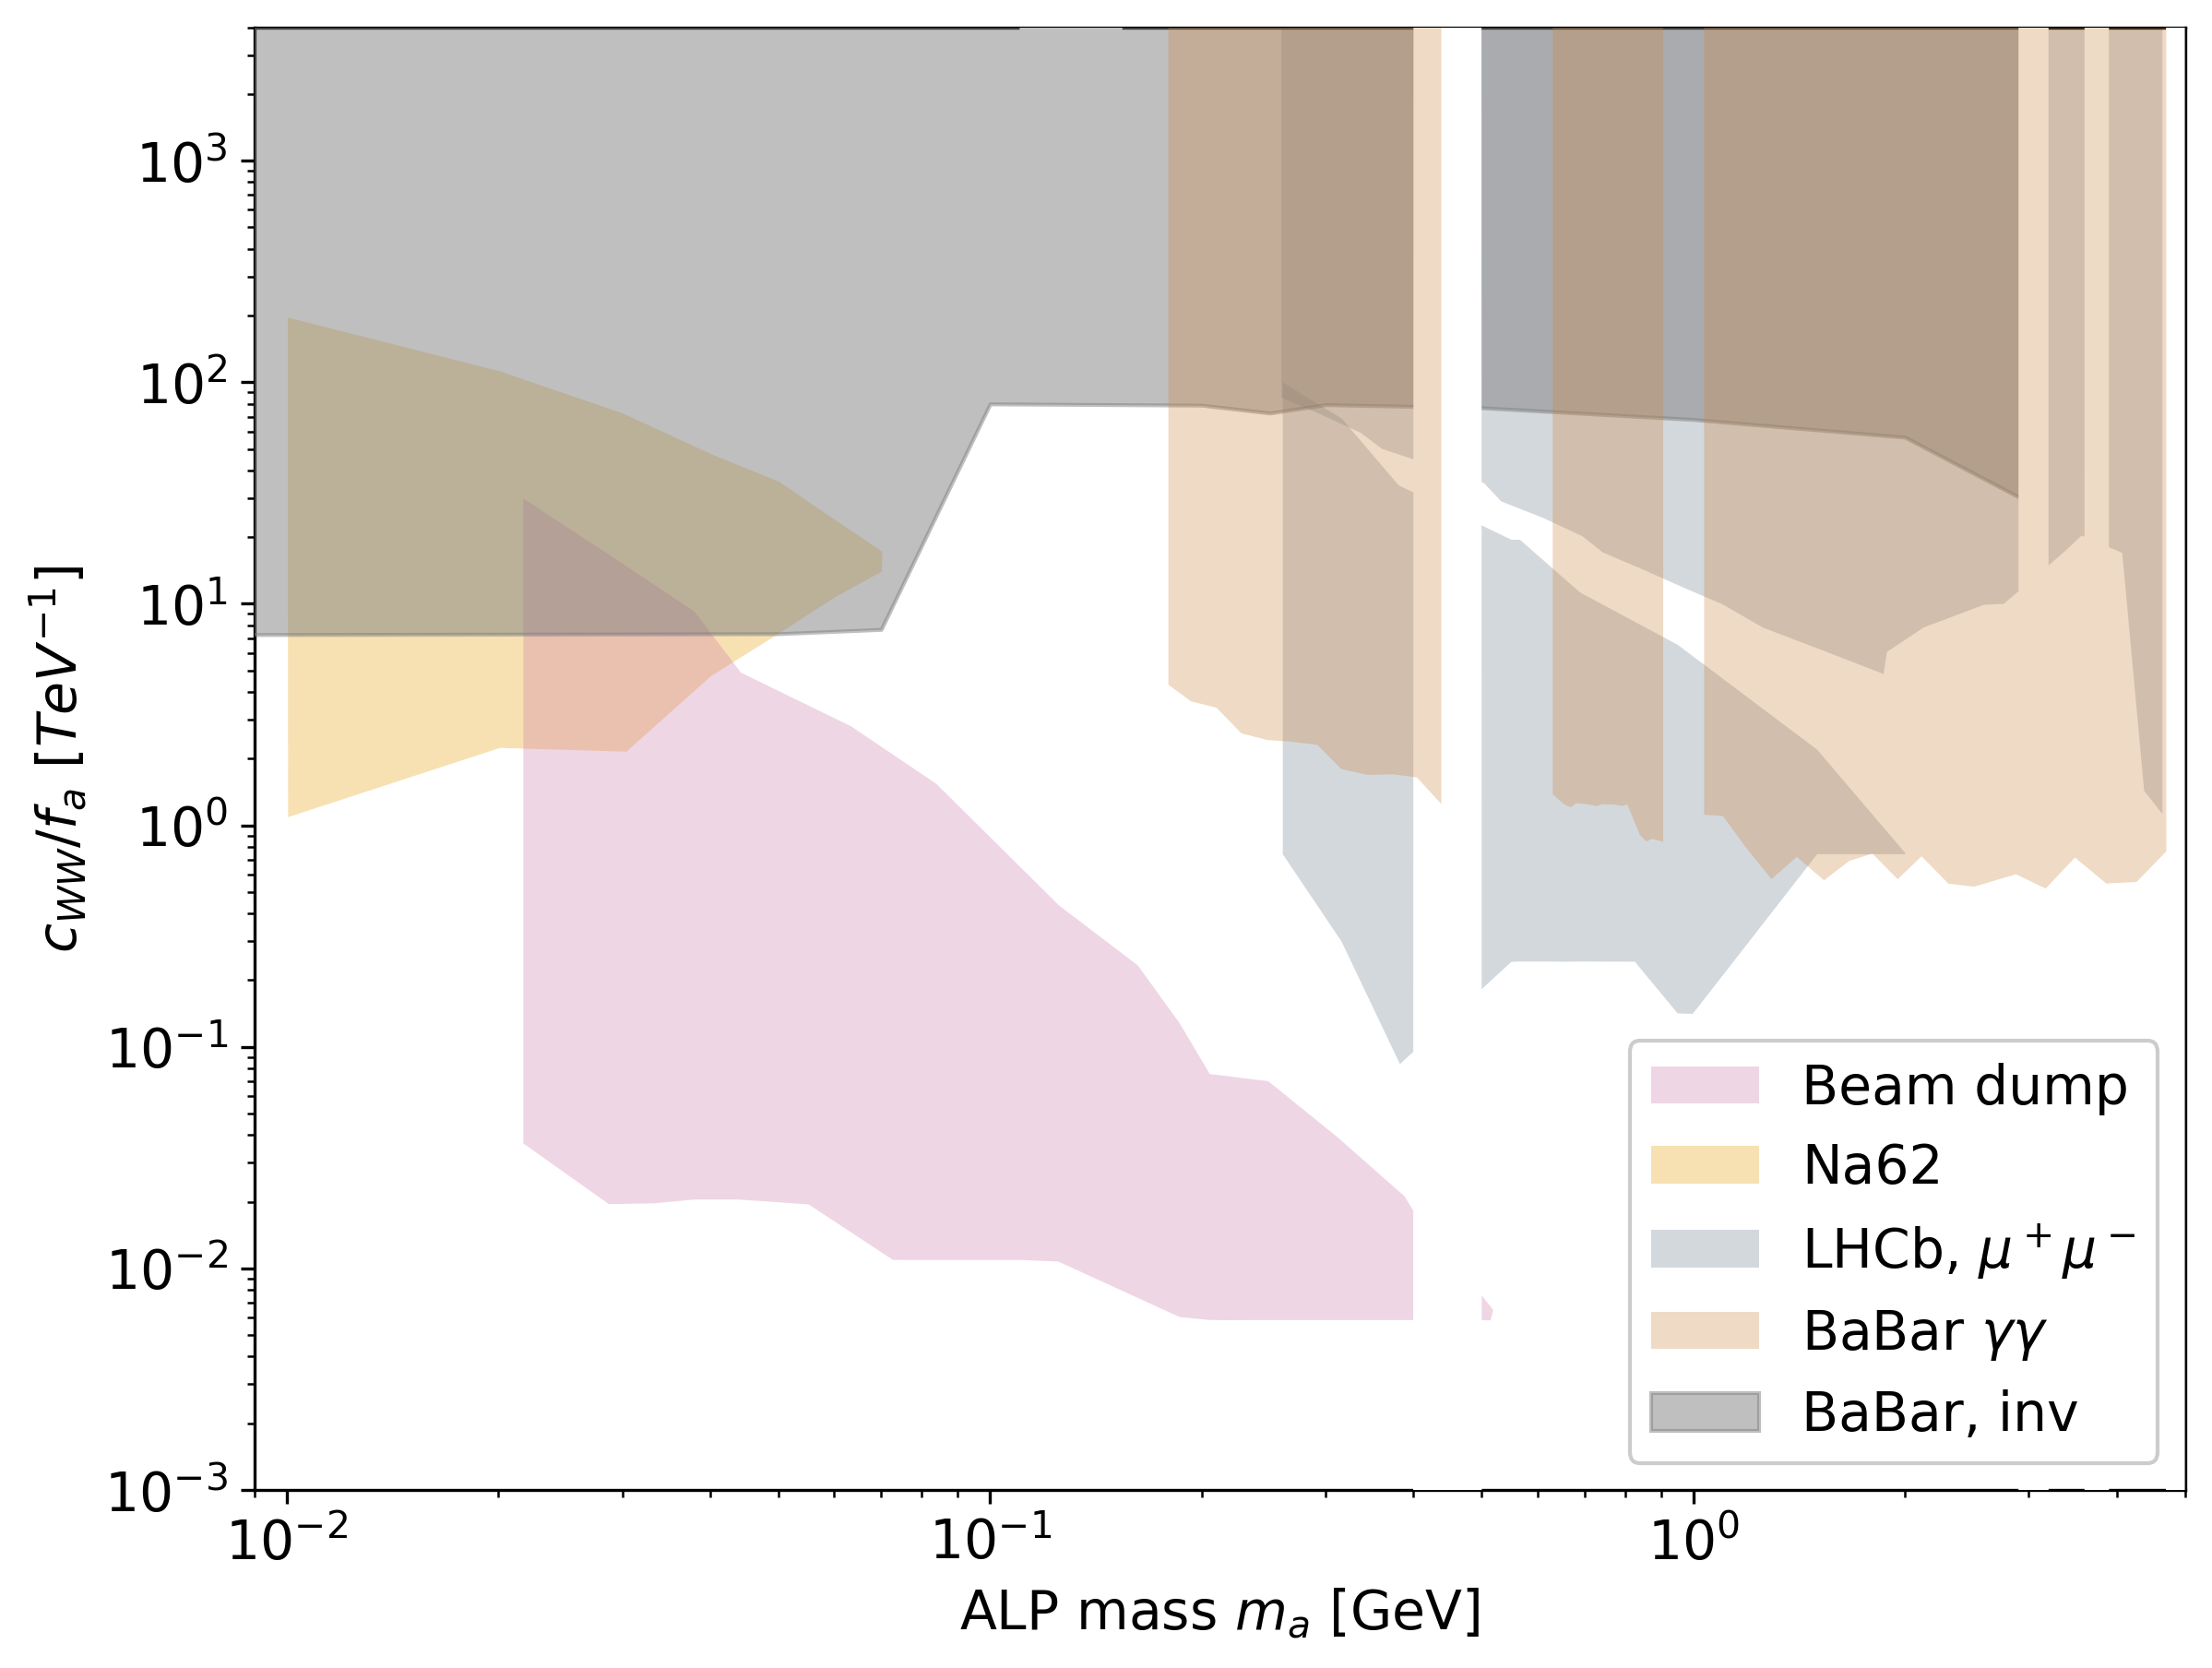

In [157]:
fig, ax = plt.subplots(figsize=(9, 7))

plotGen(BeamDumpBoundscWW,"oppacpolygon",colorBeamDump,0,None,1, label='Beam dump',zorder=3)



plotGen(Na62BoundscWW,"oppacpolygon",colorNa62,0,None,1, label='Na62',zorder=2)
plotCutOutRegions(cutoutRegionsNa62,0.05,0.2,10**-2,10**5,3,color="white")

plotGen(LHCbBoundscWW,"oppacpolygon",colorLHCb,0,6,1,label='LHCb, $\mu^+ \mu^-$',zorder=1)

# plotGen(LHCbBoundscWWlowMass,"oppacpolygon",colorLHCb,0,5,0.6, label='LHCb, $\mu^+ \mu^-$',zorder=3)
# plotGen(LHCbBoundscWWhighMass,"oppacpolygon",colorLHCb,0,5,0.6, zorder=3)
# plotCutOutRegions(cutoutRegionsLHCbHighMasses,0.3,5,3*10**-4,10**-2,5,color="black")

plotGen(LHCbBoundsPromptcWW,"oppacpolygon",colorLHCb,0,6,1,zorder=1)
plotCutOutRegions(cutoutRegionsLHCb,0.3,5,10**-3,10**5,5,color="white")

# plotCutOutRegions(cutoutRegionsLHCb,0.3,5,0.4,\
#                   LHCbBoundscWW[np.argmax(LHCbBoundscWW[10:,0]<0.5)+10][1],4,\
#                   color="black")

plotGen(BaBargammagammaBoundscWW1,"oppacpolygon",colorBaBargammagamma,0,None,1,label='BaBar $\gamma \gamma$',zorder=5)
plotGen(BaBargammagammaBoundscWW2,"oppacpolygon",colorBaBargammagamma,0,None,1,zorder=5)
plotGen(BaBargammagammaBoundscWW3,"oppacpolygon",colorBaBargammagamma,0,None,1,zorder=5)
# plotCutOutRegions(cutoutRegionsBaBargammagamma,0.1,3,10**-5,10**5,2,color="white")

ax.fill_between(BaBarBounds[:,0], BaBarBounds[:,2], y2=10**4, color=colorBaBar,zorder=4,alpha=0.5,\
               label='BaBar, inv')


ax.set_xlabel('ALP mass $m_a$ [GeV]')
ax.set_ylabel('$c_{WW}/f_a\ [TeV^{-1}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9*10**-3, 5)
ax.set_ylim(10**-3, 4*10**3)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='grey', linestyle='--',
                          markersize=15, label='BaBar, X='+"ME")
belleIIInv= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, no bg')
belleIIInv50= mlines.Line2D([], [], color=colorBelleIIinvNobkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, no bg')
belleIIInvbg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-',
                          markersize=15, label='Belle II, 0.5/ab, with bg')
belleIIInv50bg= mlines.Line2D([], [], color=colorBelleIIinvWithbkg, linestyle='-.',
                          markersize=15, label='Belle II, 50/ab, with bg')

# handles.insert(0, belleIIInv50)
# handles.insert(0, belleIIInv)
# handles.insert(0, belleIIInv50bg)
# handles.insert(0, belleIIInvbg) 
# handles.insert(0, babar)   

ax.legend(handles=handles, loc='lower right', framealpha=1)


# plt.savefig('plots/Bounds-existing-cWW.png', dpi=300, bbox_inches='tight')